Import Necessary Libraries

In [3]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


Load the Dataset

In [4]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

# View first few rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
print(df['Class'].value_counts())


Class
0.0    31677
1.0      102
Name: count, dtype: int64


Explore and Understand the Data

In [7]:
# Basic info
print(df.info())

# Check missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31780 entries, 0 to 31779
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    31780 non-null  int64  
 1   V1      31780 non-null  float64
 2   V2      31780 non-null  float64
 3   V3      31780 non-null  float64
 4   V4      31780 non-null  float64
 5   V5      31780 non-null  float64
 6   V6      31780 non-null  float64
 7   V7      31779 non-null  float64
 8   V8      31779 non-null  float64
 9   V9      31779 non-null  float64
 10  V10     31779 non-null  float64
 11  V11     31779 non-null  float64
 12  V12     31779 non-null  float64
 13  V13     31779 non-null  float64
 14  V14     31779 non-null  float64
 15  V15     31779 non-null  float64
 16  V16     31779 non-null  float64
 17  V17     31779 non-null  float64
 18  V18     31779 non-null  float64
 19  V19     31779 non-null  float64
 20  V20     31779 non-null  float64
 21  V21     31779 non-null  float64
 22

 Data Preprocessing

In [8]:
# Scale the 'Amount' feature
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Drop the 'Time' feature
df = df.drop(columns=['Time'])

# Split features and target
X = df.drop('Class', axis=1)  # Features
y = df['Class']               # Target


Data Splitting

In [11]:
# Impute or remove NaN values from the target variable 'y' before splitting
# Option 1: Remove rows with NaN values in 'y'
df = df.dropna(subset=['Class'])  # Assuming 'Class' is your target column

# Option 2: Impute NaN values with a suitable strategy (e.g., most frequent value)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent') # You can change the strategy
y_imputed = imputer.fit_transform(df[['Class']]) # Use df[['Class']] to keep it as a column vector
df['Class'] = y_imputed # Update the 'Class' column in your DataFrame


# Now proceed with the train_test_split
X = df.drop('Class', axis=1)  # Features
y = df['Class']               # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

<ipython-input-11-d25f95860c31>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'] = y_imputed # Update the 'Class' column in your DataFrame


Apply Random Forest Classifier

In [12]:
# Create the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Make Predictions

In [13]:
# Make predictions
y_pred = rf_model.predict(X_test)


Model Evaluation

In [14]:
# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
roc_score = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
print("ROC-AUC Score:", roc_score)


Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6336
         1.0       0.84      0.80      0.82        20

    accuracy                           1.00      6356
   macro avg       0.92      0.90      0.91      6356
weighted avg       1.00      1.00      1.00      6356

Confusion Matrix:

[[6333    3]
 [   4   16]]
ROC-AUC Score: 0.9738281249999999


Confusion Matrix Heatmap

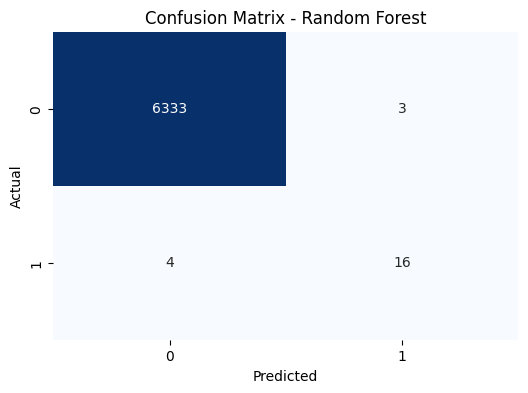

In [15]:
# Import
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


ROC Curve

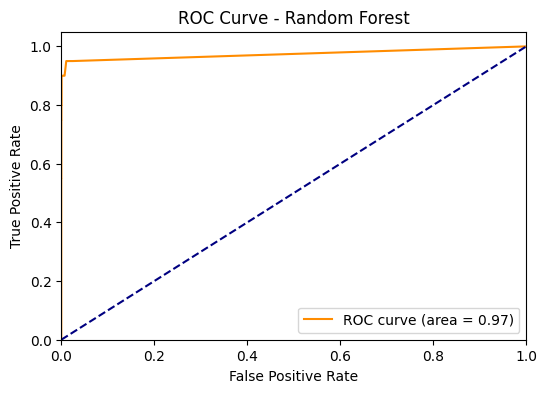

In [16]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


# Pick a random sample from X_test


In [17]:
sample = X_test.iloc[15]  # You can change the index (e.g., 10, 20, etc.)
print(sample)


V1       -0.606667
V2        1.252726
V3        1.319545
V4        1.061966
V5        0.341034
V6       -0.242905
V7        0.933736
V8       -0.068346
V9       -0.851577
V10       0.080275
V11       0.038824
V12       0.476563
V13       0.845170
V14       0.239533
V15       1.358189
V16      -0.657656
V17       0.156052
V18      -0.959307
V19       0.571466
V20       0.199552
V21      -0.349707
V22      -0.908378
V23       0.201074
V24       0.027807
V25      -0.550623
V26      -0.735049
V27       0.293690
V28       0.225790
Amount   -0.193210
Name: 18277, dtype: float64


Predict That Sample
python
Copy code


In [18]:
# Reshape the sample
sample = sample.values.reshape(1, -1)

# Predict the class
predicted_class = rf_model.predict(sample)
print("Predicted Class:", predicted_class[0])


Predicted Class: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Check the actual value

In [19]:
actual_class = y_test.iloc[15]
print("Actual Class:", actual_class)


Actual Class: 0.0


In [22]:
import joblib
joblib.dump(rf_model, 'credit_card_fraud_model.pkl') # Changed 'model' to 'rf_model'

['credit_card_fraud_model.pkl']

In [26]:
import pickle

# Save using pickle
with open('credit_card_fraud_model.pickle', 'wb') as f:
    pickle.dump(rf_model, f)

# Load the model using pickle
with open('credit_card_fraud_model.pickle', 'rb') as f:
    loaded_model = pickle.load(f)